In [1]:
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150

import vis.Visualization as visual
import vis.CommunityWise as cwise
import vis.ConsensusClustering as cc
import vis.Utils as utils

In [6]:
# These are the folders where we'll find the grids or community lists
gridFolder = 'grids'
communityFolder = 'communities'

# The parameters for running the clustering
numCommunityDetections = 6
gridPoints = 55
numHiddenDetections = 3
resolutionCenter=.80
resolutionVar=.15
figOutputFolder = 'images/cc2'

# I will assume there a few values of the parameter that give reasonable results,
# and we will onyl sample those
goodParameterValues = ['0.80', '0.90']

In [7]:
# Load in the data
pointArr, communityArr = utils.loadCommunityData(gridFolder, communityFolder, goodParameterValues)

# Select just a few communities to average over for testing
goodCommunities = np.arange(18, 36)
print(goodCommunities)
pointArr = np.array(pointArr, dtype='object')[goodCommunities]
communityArr = np.array(communityArr, dtype='object')[goodCommunities]

Misalignment or invalid communities: DM11G0.80.csv
Misalignment or invalid communities: DM11G0.90.csv
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]


[1978, 1982, 1982, 1983, 1983, 1987, 1987, 1980, 1980]
[1919, 1919, 1919, 1919, 1919, 1919, 1919, 1919, 1919]
[1919, 1919, 1919, 1919, 1919, 1919, 1919, 1919, 1919]


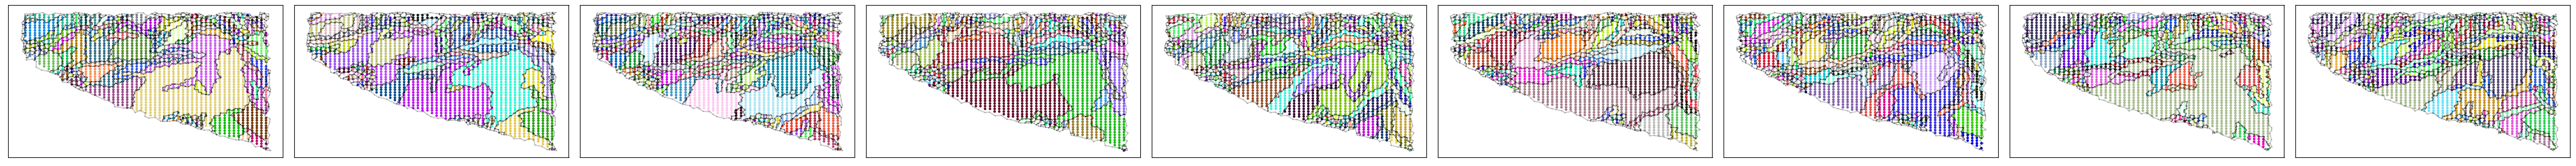

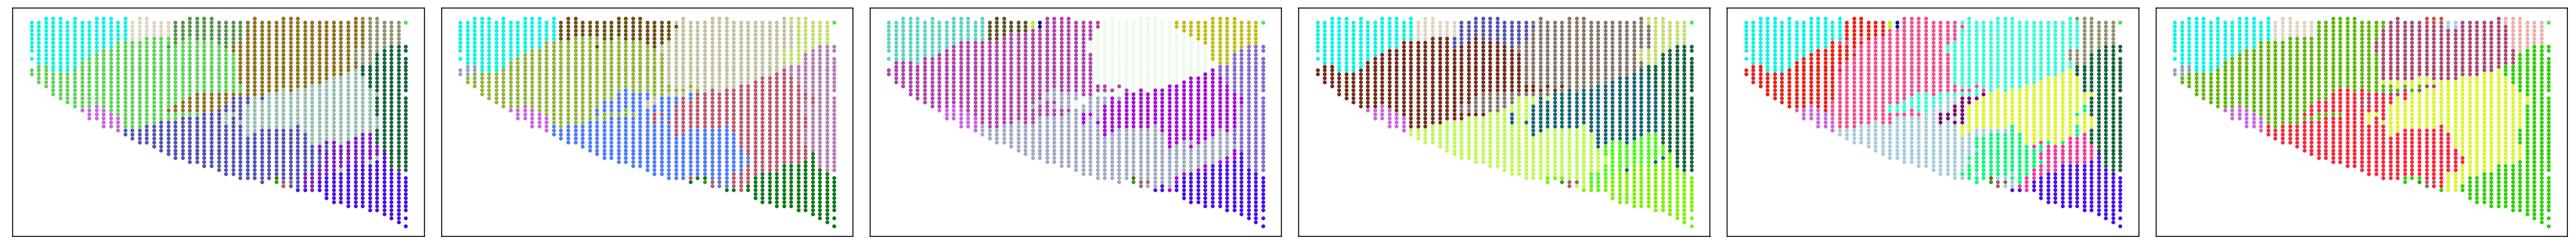

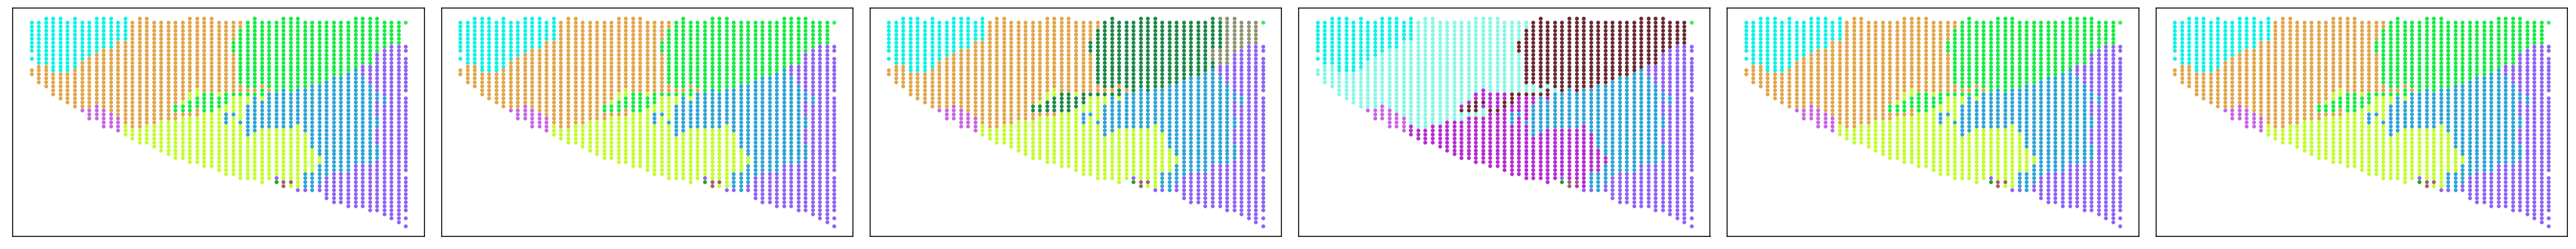

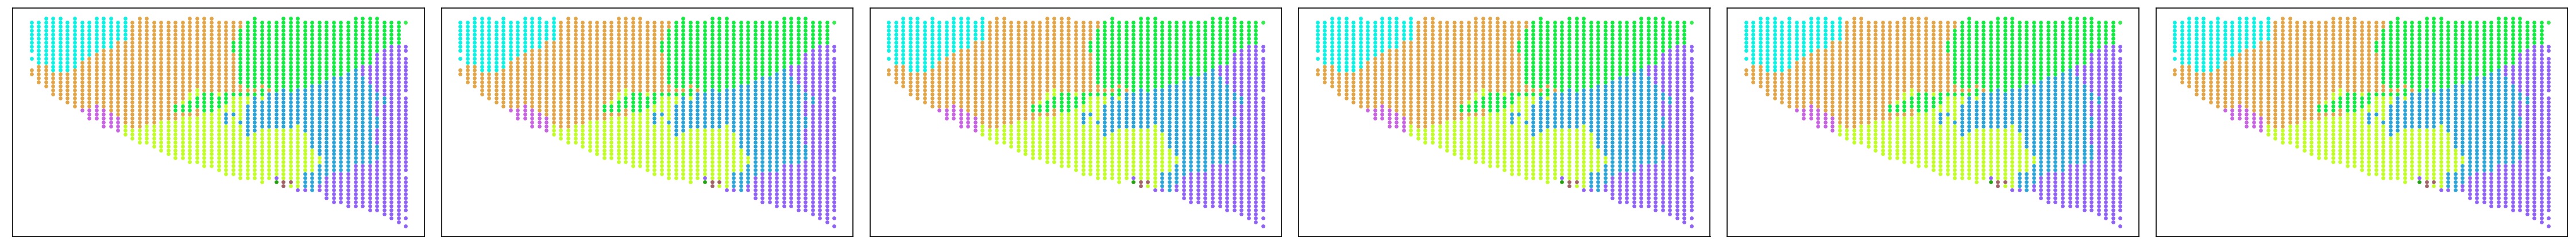

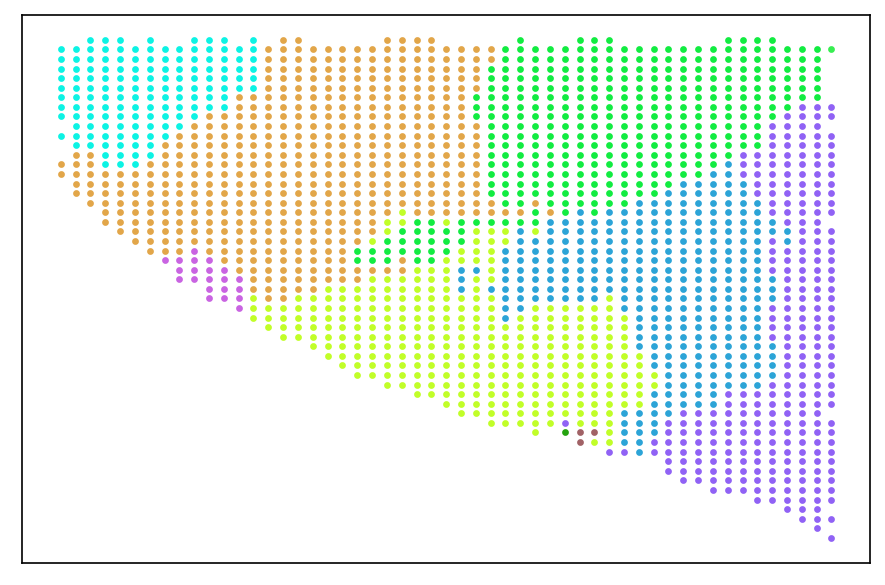

In [8]:
finalPoints, finalCommunities = cc.consensusCluster(pointArr, communityArr, numCommunityDetections=numCommunityDetections,
                                                    gridPoints=gridPoints, numHiddenDetections=numHiddenDetections,
                                                    resolutionCenter=resolutionCenter, resolutionVar=resolutionVar,
                                                    figOutputFolder=figOutputFolder)

# with open('test_consensus2.txt', 'w') as file:
#     file.write('x y community\n')
#     for i in range(len(finalPoints)):
#         file.write(f'{finalPoints[i][0]} {finalPoints[i][1]} {finalCommunities[i]}\n')

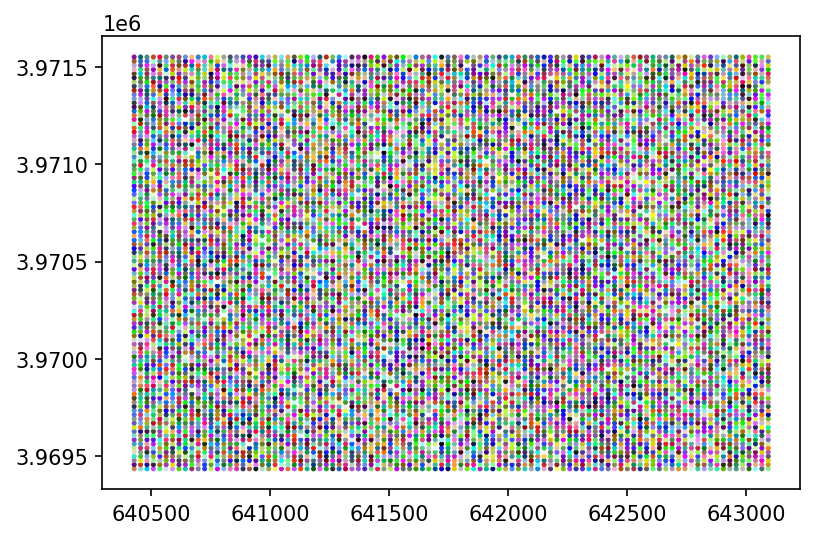

In [3]:
# Now we create a uniform grid
gridPoints = 100

# Not exactly the most efficient method to find the extreme points across
# all configurations, but it works well enough
flattenedX = []
flattenedY = []

for i in range(len(communityArr)):
    for j in range(len(pointArr[i])):
        flattenedX.append(pointArr[i][j,0])
        flattenedY.append(pointArr[i][j,1])

uniformX = np.linspace(min(flattenedX), max(flattenedX), gridPoints)
uniformY = np.linspace(min(flattenedY), max(flattenedY), gridPoints)

uniformGridPoints = np.zeros([gridPoints, gridPoints, 2])

for i in range(gridPoints):
    for j in range(gridPoints):
        uniformGridPoints[i,j] = [uniformX[i], uniformY[j]]
        
uniformGridPoints = uniformGridPoints.reshape([gridPoints*gridPoints, 2])



center = [np.mean(uniformX), np.mean(uniformY)]
extremaX = [uniformX[0], uniformX[-1]]
extremaY = [uniformY[0], uniformY[-1]]
#print(extremaX)
#print(extremaY)
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

colors = []
for i in range(len(uniformGridPoints)):
    r = int((uniformGridPoints[i][0] - extremaX[0]) / (extremaX[1] - extremaX[0]) * 255)
    g = int((uniformGridPoints[i][1] - extremaY[0]) / (extremaY[1] - extremaY[0]) * 255)
    b = int((uniformGridPoints[i][0] % 1000 ) / 10) * 128/100 + int((uniformGridPoints[i][1] % 1000 ) / 10) * 128/100
    #b = 100
    #print(r, g, b)
    colors.append(f'#{rgb_to_hex(tuple([int(r), int(g), int(b)]))}')

colors = visual.mapPointToColor(uniformGridPoints)

plt.scatter(uniformGridPoints[:,0], uniformGridPoints[:,1], c=colors, s=2)
plt.show()